![https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg](https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg)

**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `INTEGRANTES:`

* **BALTAZAR JULCA CRISTHIAN JAIME**
* **GARAY ALCANTARA ALEX**
* **GONZALES BAÑES RICARDO**

```
LABORATORIO 03:  OpenCV - Operaciones de punto
```

## `RESULTADOS DE LA EXPERIENCIA`

Importación de Librerías

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## PREGUNTA 1

Implementa una función con la forma mostrada en la figura 1, para modificar una imagen arbitraria.

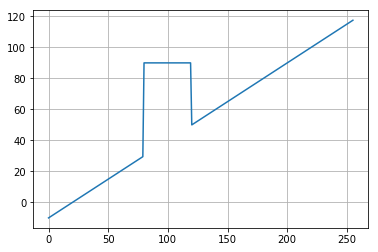

In [5]:
vect = np.zeros((256))

for i in range(256):
    if i < 80:
        vect[i]=(40/80)*(i-20)
    elif i>=80 and i<120:
        vect[i]=90
    elif i>=120:
        vect[i]=(40/80)*(i-20)
    
    
plt.plot(vect) 
plt.grid(True)

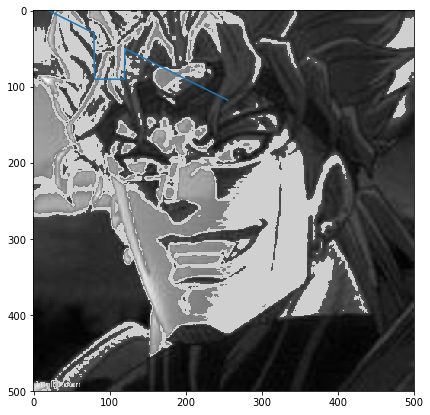

In [9]:
imgg = cv2.imread("dio.jpg", 0)
s = np.zeros(imgg.shape)

for i in range(imgg.shape[0]):
    for j in range(imgg.shape[1]):
        s[i,j] = vect[imgg[i,j]]
        
plt.figure(figsize=(7, 7))        
plt.plot(vect)     
plt.imshow(s, cmap="gray")    
plt.show()

## PREGUNTA 2 
Encripta un mensaje en dentro de una imagen usando descomposición en capas de bits. Al descomponer la imagen se debe apreciar el resultadomostrado en la figura 2.

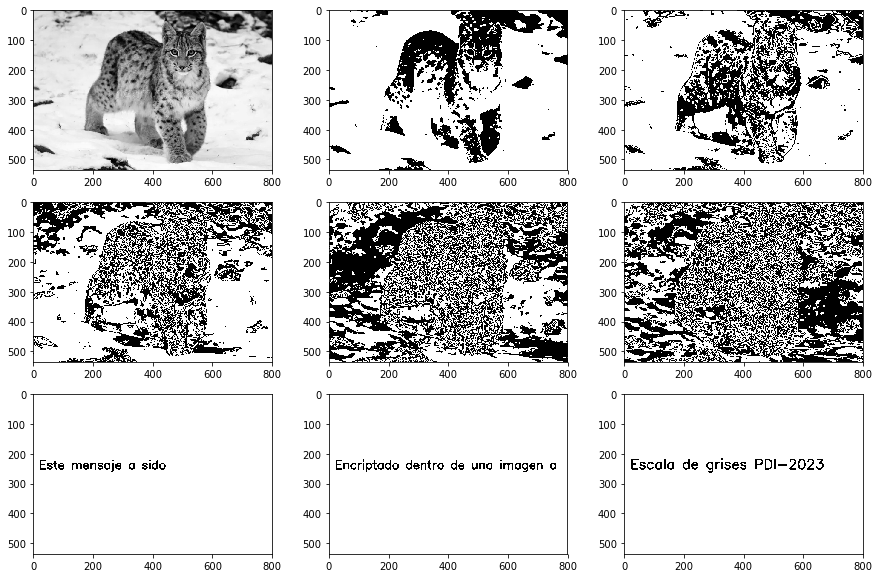

In [11]:
# Escribimos el mensaje en las capas con menos informacion de la imagen

img = cv2.imread("lince.jpg",0)

#........capa 0.......
img0 = cv2.bitwise_and(img, 1)
white = np.ones_like(img0, dtype=np.uint8) *1   #2^0
white_text=cv2.putText(white,"Escala de grises PDI-2023", (20, 250), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), thickness=3)

#......capa 1.........
img1 = cv2.bitwise_and(img, 2)
white1 = np.ones_like(img1, dtype=np.uint8) *2 #2^1
white_text1=cv2.putText(white1,"Encriptado dentro de una imagen a", (20, 250), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), thickness=3)

#......capa 2.........
img2 = cv2.bitwise_and(img, 4)
white2 = np.ones_like(img1, dtype=np.uint8) *4 #2^2
white_text2=cv2.putText(white2,"Este mensaje a sido", (20, 250), cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 0, 0), thickness=3)


img3 = cv2.bitwise_and(img, 8)
img4 = cv2.bitwise_and(img, 16)
img5 = cv2.bitwise_and(img, 32)
img6 = cv2.bitwise_and(img, 64)
img7 = cv2.bitwise_and(img, 128)


plt.figure(figsize=(15, 10))
plt.subplot(331)
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.subplot(332)
plt.imshow(img7,cmap="gray")
plt.subplot(333)
plt.imshow(img6, cmap="gray")
plt.subplot(334)
plt.imshow(img5, cmap="gray")
plt.subplot(335)
plt.imshow(img4, cmap="gray")
plt.subplot(336)
plt.imshow(img3, cmap="gray")
plt.subplot(337)
plt.imshow(white_text2, cmap="gray")
plt.subplot(338)
plt.imshow(white_text1, cmap="gray")
plt.subplot(339)
plt.imshow(white_text, cmap='gray')

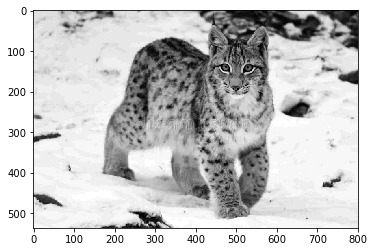

In [12]:
# Encriptando el mensaje en la imagen
img_encrip = img7+img6+img5+img4+img3+white_text2+white_text1+white_text
img_modif=img_encrip
plt.imshow(img_encrip, cmap = "gray")

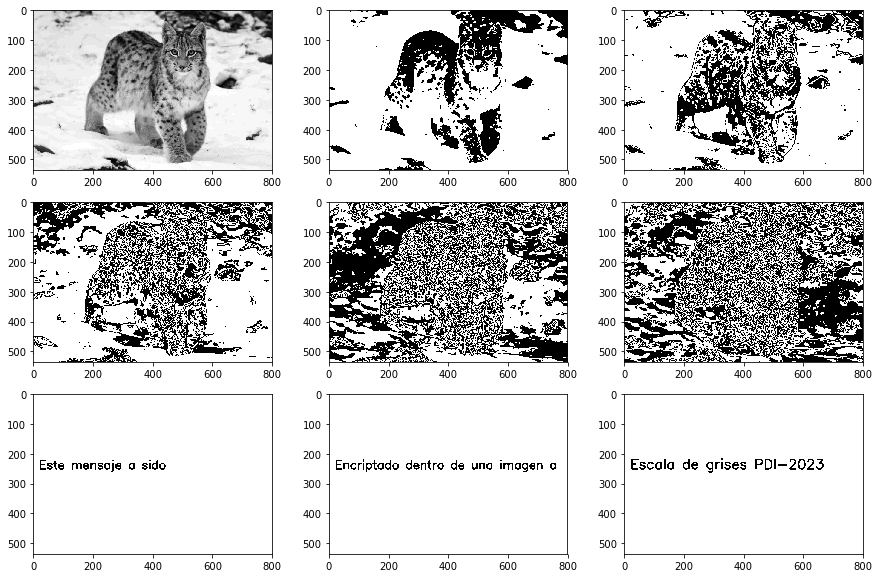

In [13]:
#Leyendo la capas de la imagen encriptada

img0_modif = cv2.bitwise_and(img_modif, 1)
img1_modif = cv2.bitwise_and(img_modif, 2)
img2_modif = cv2.bitwise_and(img_modif, 4)
img3_modif = cv2.bitwise_and(img_modif, 8)
img4_modif = cv2.bitwise_and(img_modif, 16)
img5_modif = cv2.bitwise_and(img_modif, 32)
img6_modif = cv2.bitwise_and(img_modif, 64)
img7_modif = cv2.bitwise_and(img_modif, 128)


plt.figure(figsize=(15, 10))
plt.subplot(331)
plt.imshow(img_encrip, cmap="gray", vmin=0, vmax=255)
plt.subplot(332)
plt.imshow(img7_modif,cmap="gray")
plt.subplot(333)
plt.imshow(img6_modif, cmap="gray")
plt.subplot(334)
plt.imshow(img5_modif, cmap="gray")
plt.subplot(335)
plt.imshow(img4_modif, cmap="gray")
plt.subplot(336)
plt.imshow(img3_modif, cmap="gray")
plt.subplot(337)
plt.imshow(img2_modif, cmap="gray")
plt.subplot(338)
plt.imshow(img1_modif, cmap="gray")
plt.subplot(339)
plt.imshow(img0_modif, cmap='gray')

## PREGUNTA 3
Algoritmo de especificación de histograma de una imagen en escala de grises.

In [18]:
def calculate_cdf(histogram):
    # Get the cumulative sum of the elements
    cdf = histogram.cumsum()
 
    # Normalize the cdf
    normalized_cdf = cdf / float(cdf.max())
 
    return normalized_cdf
 
def calculate_lookup(src_cdf, ref_cdf):
    lookup_table = np.zeros(256)
    lookup_val = 0
    for src_pixel_val in range(len(src_cdf)):
        lookup_val
        for ref_pixel_val in range(len(ref_cdf)):
            if ref_cdf[ref_pixel_val] >= src_cdf[src_pixel_val]:
                lookup_val = ref_pixel_val
                break
        lookup_table[src_pixel_val] = lookup_val
    return lookup_table
 
def match_histograms(src_image, ref_image):
    # Split the images into the different color channels
    # b means blue, g means green and r means red
    src_b, src_g, src_r = cv2.split(src_image)
    ref_b, ref_g, ref_r = cv2.split(ref_image)
    
    # Compute the b, g, and r histograms separately
    # The flatten() Numpy method returns a copy of the array c
    # collapsed into one dimension.
    src_hist_blue, bin_0 = np.histogram(src_b.flatten(), 256, [0,256])
    src_hist_green, bin_1 = np.histogram(src_g.flatten(), 256, [0,256])
    src_hist_red, bin_2 = np.histogram(src_r.flatten(), 256, [0,256])  
    
    ref_hist_blue, bin_3 = np.histogram(ref_b.flatten(), 256, [0,256])    
    ref_hist_green, bin_4 = np.histogram(ref_g.flatten(), 256, [0,256])
    ref_hist_red, bin_5 = np.histogram(ref_r.flatten(), 256, [0,256])
 
    # Compute the normalized cdf for the source and reference image
    src_cdf_blue = calculate_cdf(src_hist_blue)
    src_cdf_green = calculate_cdf(src_hist_green)
    src_cdf_red = calculate_cdf(src_hist_red)
    
    ref_cdf_blue = calculate_cdf(ref_hist_blue)
    ref_cdf_green = calculate_cdf(ref_hist_green)
    ref_cdf_red = calculate_cdf(ref_hist_red)
 
    # Make a separate lookup table for each color
    blue_lookup_table = calculate_lookup(src_cdf_blue, ref_cdf_blue)
    green_lookup_table = calculate_lookup(src_cdf_green, ref_cdf_green)
    red_lookup_table = calculate_lookup(src_cdf_red, ref_cdf_red)
 
    # Use the lookup function to transform the colors of the original
    # source image
    blue_after_transform = cv2.LUT(src_b, blue_lookup_table)
    green_after_transform = cv2.LUT(src_g, green_lookup_table)
    red_after_transform = cv2.LUT(src_r, red_lookup_table)
 
    # Put the image back together
    image_after_matching = cv2.merge([
        blue_after_transform, green_after_transform, red_after_transform])
    image_after_matching = cv2.convertScaleAbs(image_after_matching)
 
    return image_after_matching
 
"""
Main program.
"""
image_src_name = "CanoCristales.jpg"
image_ref_name = 'delfin.jpg'

# Load the images and store them into a variable
image_src = cv2.imread(image_src_name)  
image_ref = cv2.imread(image_ref_name) 

# Check if the images loaded properly
if image_src is None:
    print('Failed to load source image file:', image_src_name)
    sys.exit(1)
elif image_ref is None:
    print('Failed to load reference image file:', image_ref_name)
    sys.exit(1)
else:
    # Do nothing
    pass

# Calculate the matched image
output_image = match_histograms(image_src, image_ref)


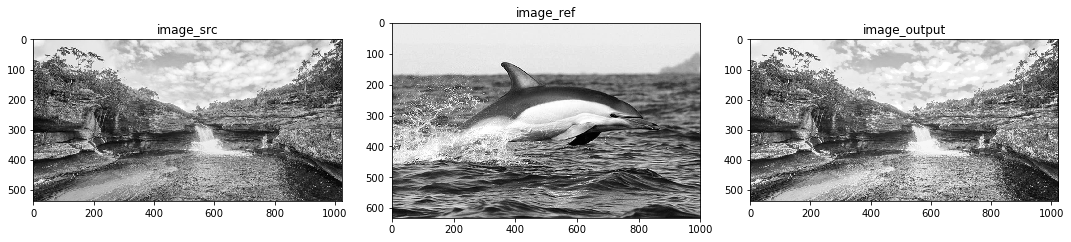

In [19]:
### Gráfica de Imagenes

# Load the images and store them into a variable
image_src = cv2.imread(image_src_name)  
image_ref = cv2.imread(image_ref_name) 

image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)
image_ref = cv2.cvtColor(image_ref, cv2.COLOR_BGR2GRAY)
output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2GRAY)

# Configura una figura con 1 fila y 3 columnas para mostrar las tres imágenes
plt.figure(figsize=(15, 7))

# Muestra la imagen en escala de grises correspondiente al canal azul
plt.subplot(131)
plt.imshow(image_src, cmap="gray", vmin=0, vmax=255)
plt.title('image_src')

# Muestra la imagen en escala de grises correspondiente al canal verde
plt.subplot(132)
plt.imshow(image_ref, cmap="gray", vmin=0, vmax=255)
plt.title('image_ref')

# Muestra la imagen en escala de grises correspondiente al canal rojo
plt.subplot(133)
plt.imshow(output_image, cmap="gray", vmin=0, vmax=255)
plt.title('image_output')

# Ajusta la disposición de las imágenes
plt.tight_layout()

# Muestra la figura
plt.show()

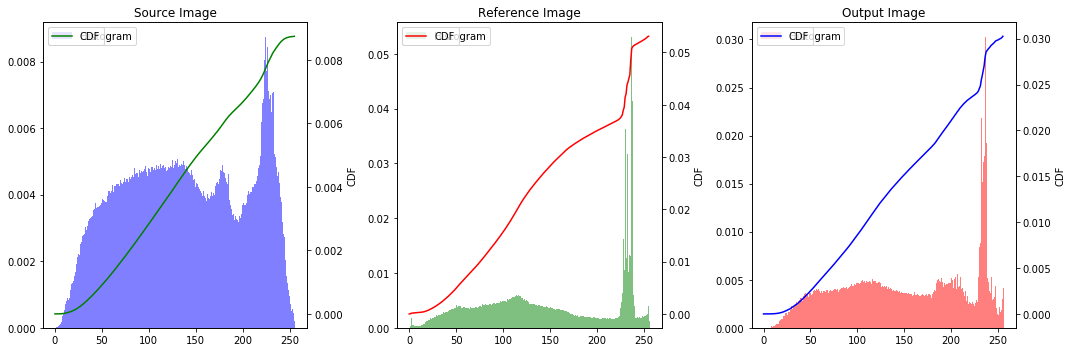

In [20]:
## Gráfica de Histogramas y CDF normalizado

# Crear una figura con 1 fila y 3 columnas para los subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Calcular y plotear el histograma y el CDF de la imagen de origen
hist_src = axs[0].hist(image_src.flatten(), 256, [0, 256], density=True, alpha=0.5, color='b', label='Histogram')
axs[0].set_title('Source Image')
axs[0].legend()
cdf_src = hist_src[0].cumsum()
cdf_src_normalized = cdf_src * (hist_src[0].max()) / cdf_src.max()
axs_cdf_src = axs[0].twinx()
axs_cdf_src.plot(cdf_src_normalized, color='g', label='CDF')
axs_cdf_src.set_ylabel('CDF')
axs_cdf_src.legend()

# Calcular y plotear el histograma y el CDF de la imagen de referencia
hist_ref = axs[1].hist(image_ref.flatten(), 256, [0, 256], density=True, alpha=0.5, color='g', label='Histogram')
axs[1].set_title('Reference Image')
axs[1].legend()
cdf_ref = hist_ref[0].cumsum()
cdf_ref_normalized = cdf_ref * (hist_ref[0].max()) / cdf_ref.max()
axs_cdf_ref = axs[1].twinx()
axs_cdf_ref.plot(cdf_ref_normalized, color='r', label='CDF')
axs_cdf_ref.set_ylabel('CDF')
axs_cdf_ref.legend()

# Calcular y plotear el histograma y el CDF de la imagen modificada
hist_modified = axs[2].hist(output_image.flatten(), 256, [0, 256], density=True, alpha=0.5, color='r', label='Histogram')
axs[2].set_title('Output Image')
axs[2].legend()
cdf_modified = hist_modified[0].cumsum()
cdf_modified_normalized = cdf_modified * (hist_modified[0].max()) / cdf_modified.max()
axs_cdf_modified = axs[2].twinx()
axs_cdf_modified.plot(cdf_modified_normalized, color='b', label='CDF')
axs_cdf_modified.set_ylabel('CDF')
axs_cdf_modified.legend()

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

## `Test de comprobación`

**a) Averigüe como crear un histograma en 2d con OpenCV.**

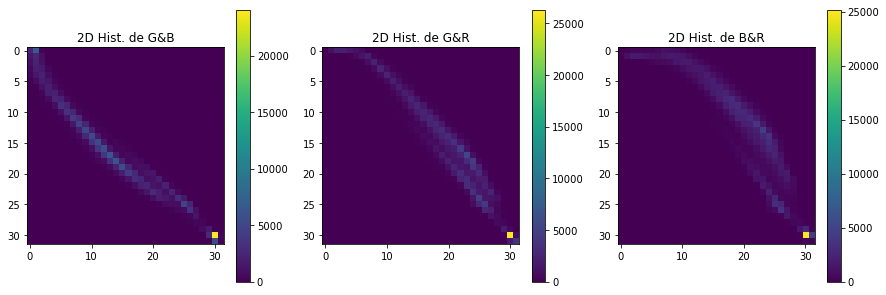

Histograma 2D de dimensiones (32, 32) con un total de 1024 valores.


In [2]:
import cv2
from matplotlib import pyplot as plt

# Cargamos la imagen de entrada.
image = cv2.imread("emma.jpg")

# Dividimos la imagen en sus canales de color.
channels = cv2.split(image)

cv2.imshow('Original', image)
cv2.waitKey(0)

# Armamos tres pares de canales cuyo histograma vamos a dibujar:
# - Verde y Azul (G&B).
# - Verde y Rojo (G&R).
# - Azul y Rojo (B&R)
channel_pairs = [(channels[1], channels[0]), (channels[1], channels[2]), (channels[0], channels[2])]
pairs_titles = ['G&B', 'G&R', 'B&R']

# Creamos una figura más grande para mostrar los histogramas.
fig = plt.figure(figsize=(15, 5))

# Iteramos sobre cada par...
for position, (chs, title) in enumerate(zip(channel_pairs, pairs_titles), start=1):
    # Añadimos un subgráfico correspondiente al par actual.
    ax = fig.add_subplot(130 + position)

    # Calculamos el histograma
    histogram = cv2.calcHist(chs, [0, 1], None, [32, 32], [0, 256, 0, 256])

    # Dibujamos el histograma y lo titulamos.
    p = ax.imshow(histogram, interpolation='nearest')
    ax.set_title(f'2D Hist. de {title}')

    # Añadimos a la leyenda una barra de color para ayudarnos a interpretar el histograma.
    plt.colorbar(p)

# Mostramos el resultado.
plt.show()

# Imprimimos las dimensiones del histograma.
print(f'Histograma 2D de dimensiones {histogram.shape} con un total de {histogram.flatten().shape[0]} valores.')

# Cerramos las ventanas creadas.
cv2.destroyAllWindows()

**b) Defina una función que ingresando un rango de entrada (ej. 100, 120), se
cree una función para expandir ese rango, en todo el rango dinámico de 0 a
255.**


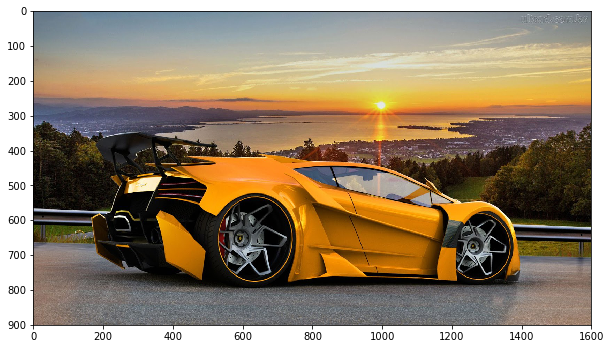

In [7]:
img_auto = cv2.imread("auto.jpg",0)

img_original= cv2.imread("auto.jpg")
img_color = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img_color)
plt.show()

[  0   1   2   3   4   5   6   7   8   9   0   1   3   4   6   7   9  11
  12  14  15  17  19  20  22  23  25  27  28  30  31  33  35  36  38  39
  41  43  44  46  47  49  51  52  54  55  57  58  60  62  63  65  66  68
  70  71  73  74  76  78  79  81  82  84  86  87  89  90  92  94  95  97
  98 100 102 103 105 106 108 109 111 113 114 116 117 119 121 122 124 125
 127 129 130 132 133 135 137 138 140 141 143 145 146 148 149 151 153 154
 156 157 159 160 162 164 165 167 168 170 172 173 175 176 178 180 181 183
 184 186 188 189 191 192 194 196 197 199 200 202 204 205 207 208 210 211
 213 215 216 218 219 221 223 224 226 227 229 231 232 234 235 237 239 240
 242 243 245 247 248 250 251 253 255 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

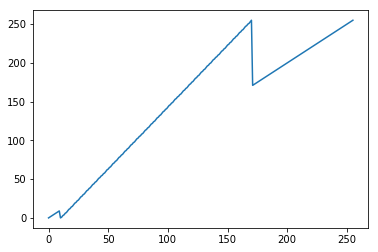

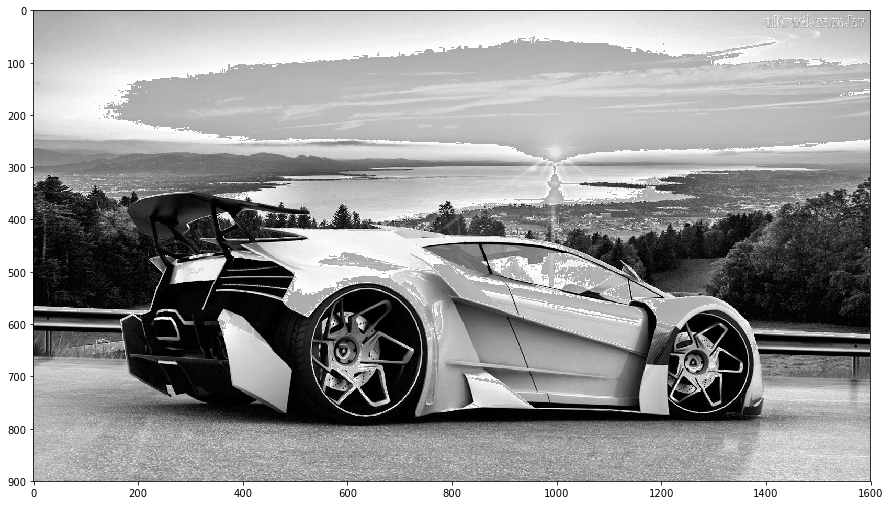

In [12]:
# Alternativa 1: Modificamos el rango de la funcion 

def expand_range(input_range):
    funcion_ejemplo = np.arange(256)

    rango_inferior, rango_superior = input_range

    for val in range(rango_inferior, rango_superior + 1):
        funcion_ejemplo[val] = int((val - rango_inferior) * 255 / (rango_superior - rango_inferior))

    return funcion_ejemplo

input_range = (10, 170)
funcion_expandida = expand_range(input_range)  #Retornamos la funcion ejemplo y lo almacenamos en la variable funcion_expandida

img_auto = cv2.imread("auto.jpg", 0)
img_out = np.empty_like(img_auto)

for m in range(img_auto.shape[0]):
    for n in range(img_auto.shape[1]):
        img_out[m, n] = funcion_expandida[img_auto[m, n]]

print(funcion_expandida)

plt.plot(funcion_expandida)
plt.figure(figsize=(15,10))
plt.imshow(img_out,cmap="gray",vmin=0,vmax=255)
plt.show()


**c) Definir una función matemaatica para aumentar o reducir el brillo de una imagen, según valor especificado.**


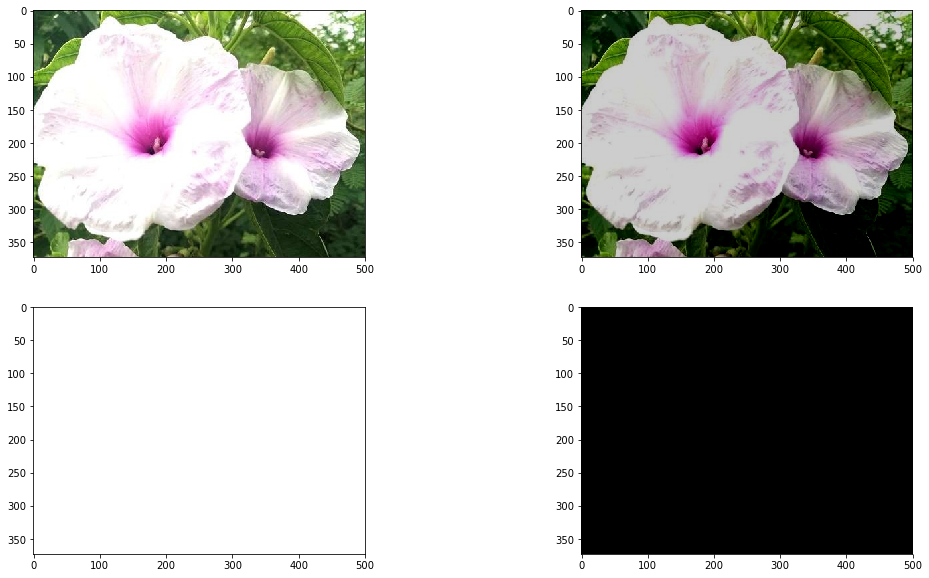

In [42]:
def adjust_brightness(image, value):
  
    # Convert the image to float32 for operations
    image = np.float32(image)
    
    # Adjust the brightness
    image = image + value
    
    # Ensure the values are in the range [0, 255]
    image = np.clip(image, 0, 255)
    
    # Convert the image back to uint8
    image = np.uint8(image)
    
    return image

# For example:
img = "image_adjusted.jpg"

image_bgr = cv2.imread(img)
# Imagen de BGR a RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Ajustando brillo de la imagen 
image_adjusted1 = adjust_brightness(image_rgb, -50)
# Ajustando brillo de la imagen 
image_adjusted2 = adjust_brightness(image_rgb, 256)
# Ajustando brillo de la imagen
image_adjusted3 = adjust_brightness(image_rgb, -256)

# Mostrando imagen 
plt.figure(figsize=(18, 10))
plt.subplot(221)
plt.imshow(image_rgb)
plt.subplot(222)
plt.imshow(image_adjusted1)
plt.subplot(223)
plt.imshow(image_adjusted2)
plt.subplot(224)
plt.imshow(image_adjusted3)


